# Glass Type Classification

### About the Data
The data we will be using has the following attributes relating to glass type:

    1. Id number
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent(concentration) in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. [Target] Type of glass: (For context, float glass is a type of glass commonly used in windows, glass doors, facades, skylights, partitions, mirrors, and automotive windshields.)
        -- 1 building_windows_float_processed
        -- 2 building_windows_non_float_processed
        -- 3 vehicle_windows_float_processed
        -- 4 vehicle_windows_non_float_processed (none in this dataset)
        -- 5 containers
        -- 6 tableware
        -- 7 headlamps


### Objective

    At the request of a team of forensic scientists, we have been contracted to interpret and analyze a collection of glass found at crime scenes. Specifically we were asked to:
    
         -- Classify the type of glass that can be found in a crime scene given the attributes of the glass.
         
    Correctly identifying the type of glass left at a given crime scene can be used as valuable evidence in criminological investigation.

    As data scientists, we will explore the data and implement different classification models to find a solution that yields the correct glass classification with the best accuracy and precision.

    Our team decided to use 3 different classification models:

     -- Naive Bayes Classifier
     -- Decision Tree Classifier
     -- KNN Classifier (K-Neariest Neighbors)

### Part 1: Importing Libraries

In [26]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Model Creation & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

### Part 2: Data Exploration

In [27]:
data = pd.read_csv('glass.data', header=None)
columns = ['ID', 'Refract Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass Type']
data.columns = columns

In [28]:
data.head()

,ID,Refract Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   Refract Index  214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Glass Type     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There does not seem to be any missing values.

In [30]:
data.describe()

,ID,Refract Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [31]:
data.shape

(214, 11)

In [32]:
#Check for null values
data.isnull().sum()

ID               0
Refract Index    0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Glass Type       0
dtype: int64

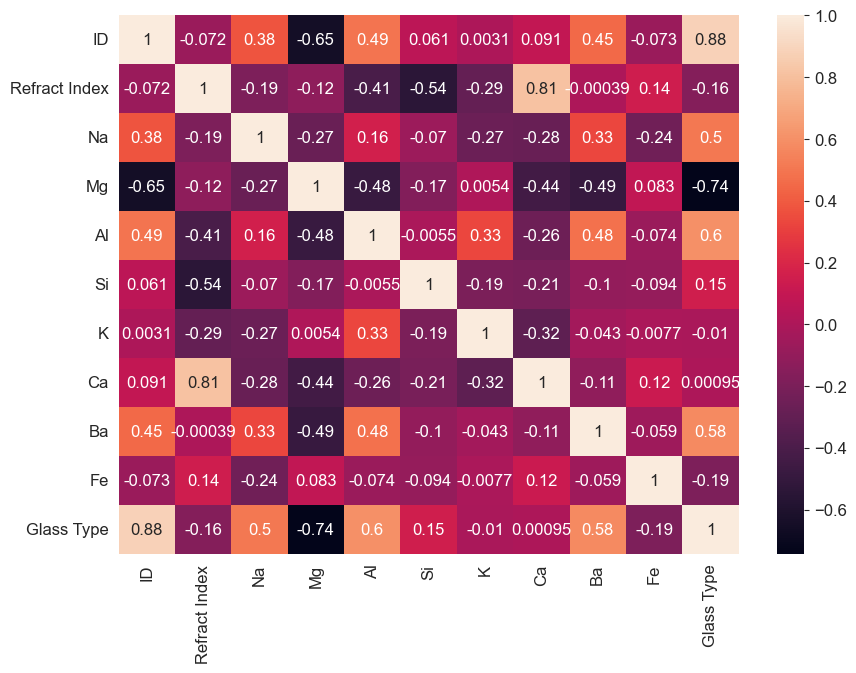

In [33]:
#### Visualizations
# Correlation Heat Map
sns.heatmap(data.corr(), annot=True)
plt.show()

Some notable observations:

    Glass Type seems to have a strong negative correlation with Magnesium. This shows that Magnesium is an influencial element regarding the type of glass.

    Aluminum and Sodium seems to have a positive correlation with Glass type as well.

    There seems to be an extremly strong positive relationship between Refract Index and Calcium levels in glass.

    No signs of multicollinearity

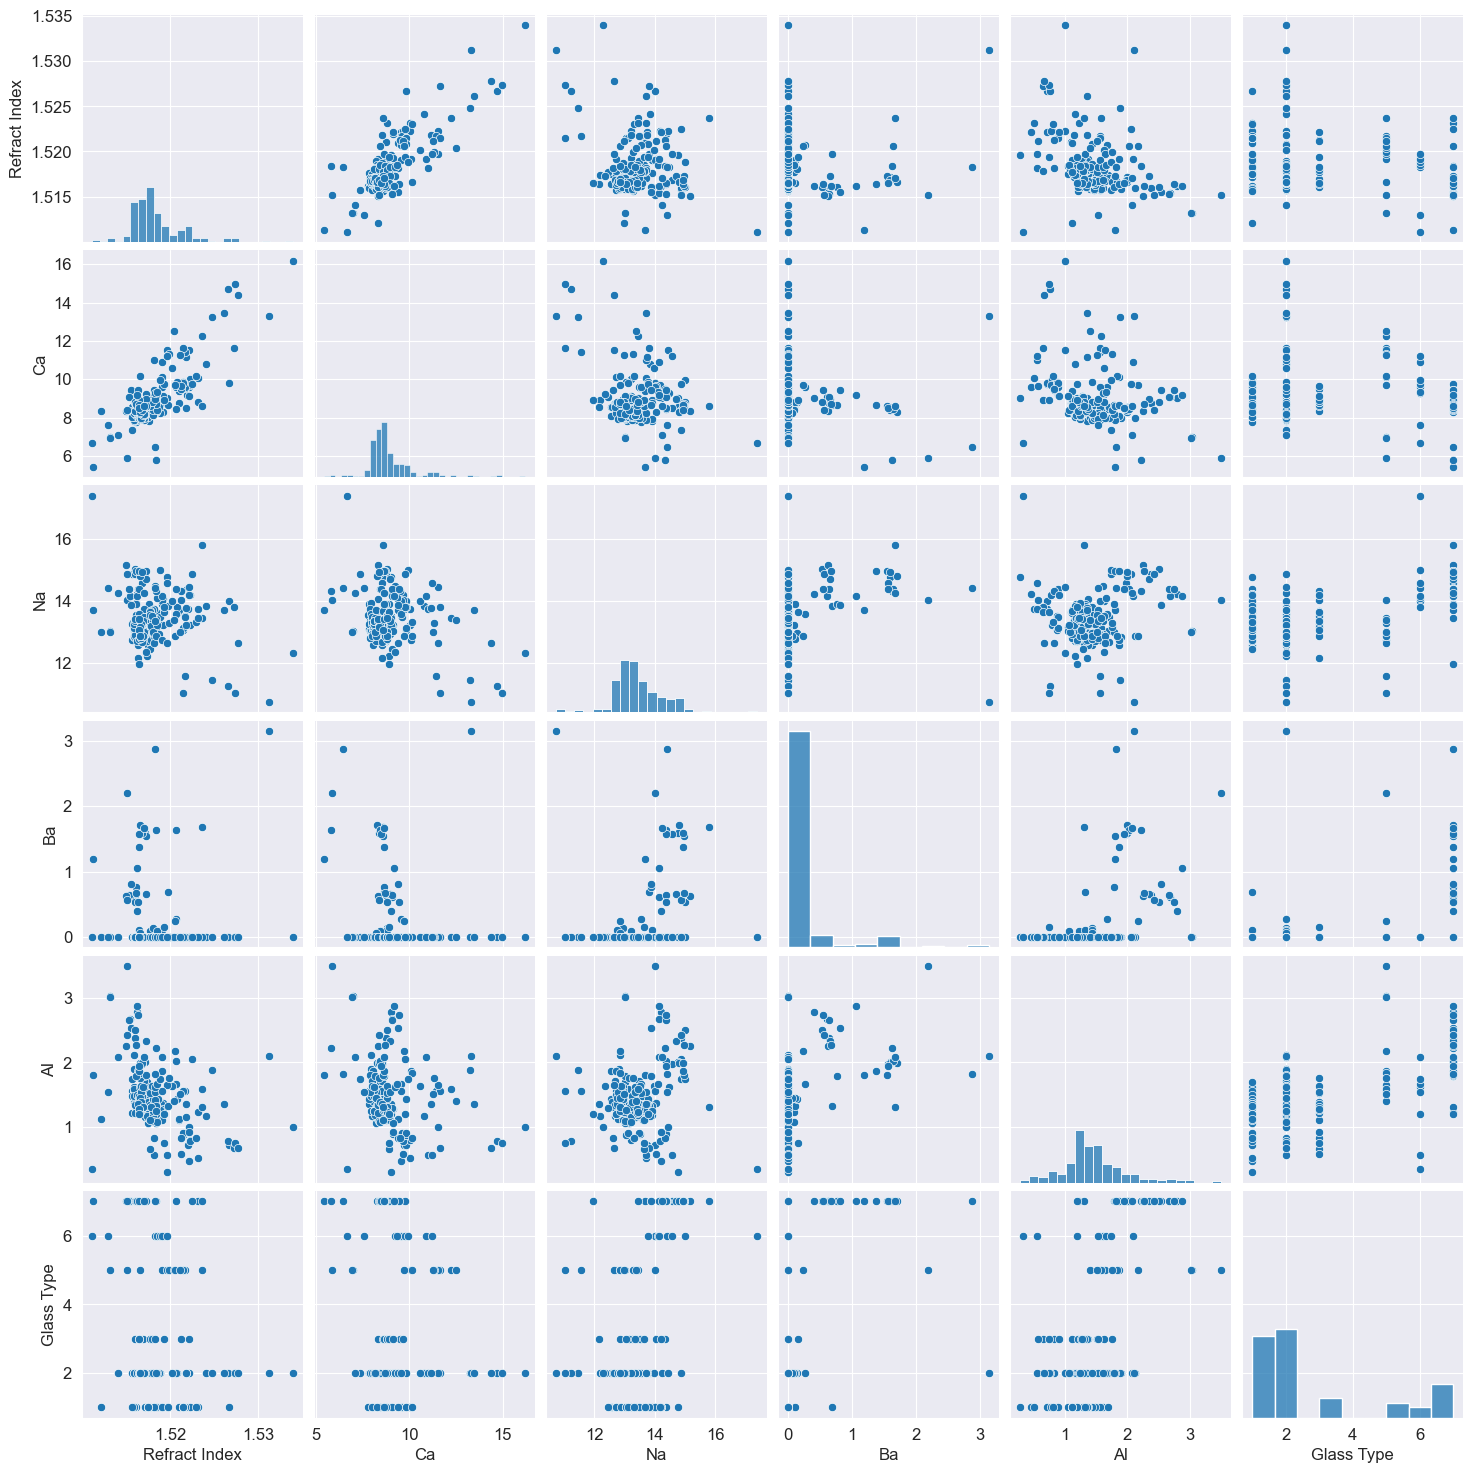

In [34]:
variables = ['Refract Index', 'Ca', 'Na', 'Ba', 'Al', 'Glass Type']
sns.pairplot(data[variables])
plt.show()


    Consistient with the heatmap, we can see a strong relationship exists between Refract Index and Calcium Concentration.

    We can see that the distribution of Glass Type is bimodal, which means we have unbalanced classes.

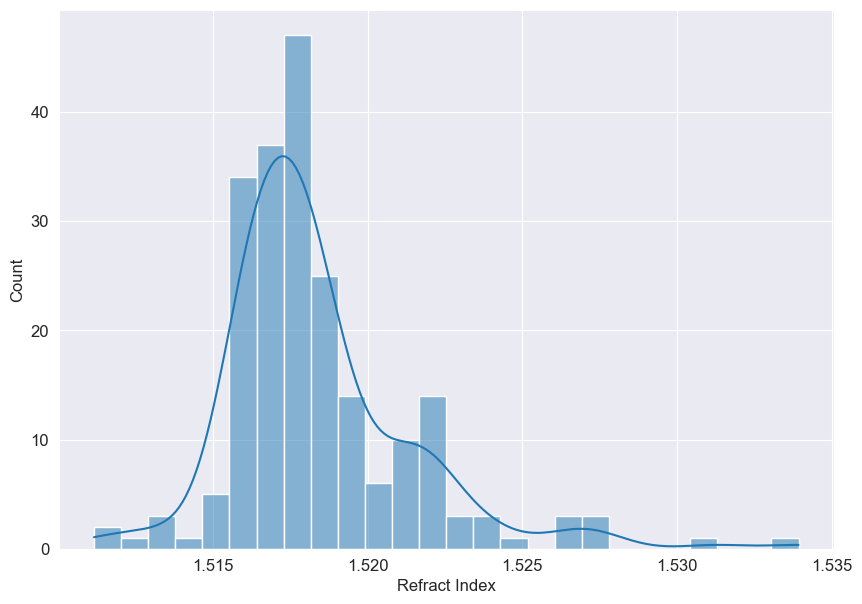

In [35]:
# Distribution of Refractive Index
sns.histplot(data=data, x='Refract Index', kde=True)
plt.show()


    The distribution of the refract index in the dataset seems to be skewed right.

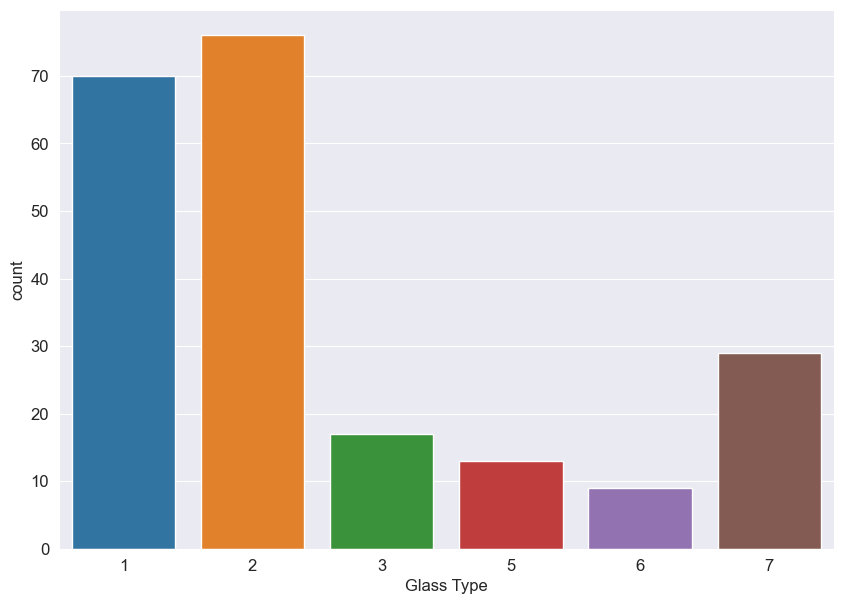

In [36]:
# Glass type countplot
sns.countplot(data=data, x='Glass Type')
plt.show()


    It seems that a lot of our data are Type 1 and Type 2 glass compared to the others, this means that we have unbalanced classes.

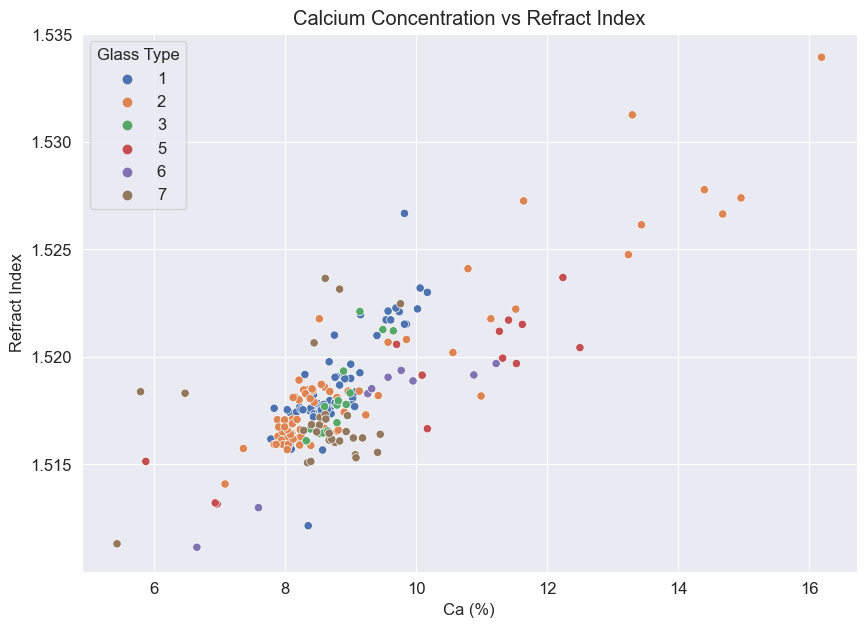

In [37]:
# Refract Index vs Ca Concentration Scatterplot
sns.scatterplot(x = data['Ca'], y = data['Refract Index'], hue = data['Glass Type'], palette='deep')
plt.xlabel('Ca (%)')
plt.title('Calcium Concentration vs Refract Index')
plt.show()


    A positive linear relationship exists between Calcium and Refract Index.

    It seems that most type 7 glass has a refract index between 1.51 and 1.52 with a Calcium concentration between 8 and 10.

    Glass Type 2 seems to have higher variance in Refract Index and Calcium levels, tending to have more spread in the data. Glass Type 2 also seems to be the only glass type with Calcium levels and Index above 14 & 1.53 respectively.

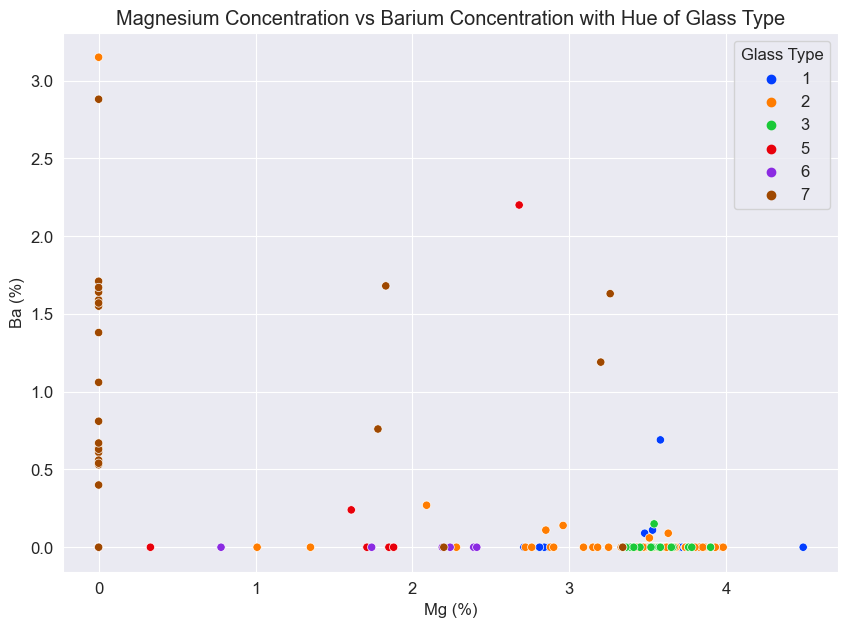

In [38]:
# Refract Index vs Ca Concentration Scatterplot
sns.scatterplot(x = data['Mg'], y = data['Ba'], hue = data['Glass Type'], palette= 'bright')
plt.xlabel('Mg (%)')
plt.ylabel('Ba (%)')
plt.title('Magnesium Concentration vs Barium Concentration with Hue of Glass Type')
plt.show()


    There seems to be overall a very low to no concentration of Barium for most Glass Types except for Glass Type 7. 
    This could mean that high barium concentration could be a good indicator that the glass is a headlamp glass.

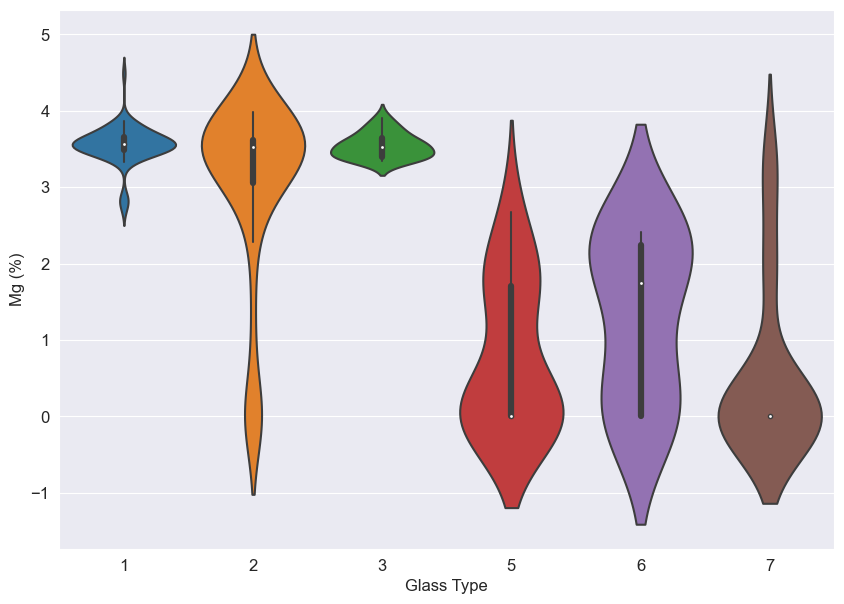

In [39]:
# Distribution of Magnesium concentration on different types of glass using violin plots
sns.violinplot(x='Glass Type', y='Mg', data=data, scale='width')
plt.ylabel('Mg (%)')
plt.show()


    Glass types 1,2 & 3 all have higher average Magnesium concentration

    Glass types 5 & 6 have high variance in the distribution of Magnesium concentration.

    Glass type 7 has a low average Magnesium concentration

### Part 3: Data Preprocessing

In [40]:
y = data['Glass Type'].values
y = y.reshape(-1,1)
#Drop ID column - It is not needed - --Glass Type is the target variable
######################################################################
x_data = data.drop(['Glass Type','ID'],axis = 1)
print(x_data)

     Refract Index     Na    Mg    Al     Si     K    Ca    Ba   Fe
0          1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1          1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2          1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3          1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4          1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..             ...    ...   ...   ...    ...   ...   ...   ...  ...
209        1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210        1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211        1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212        1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213        1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [41]:
#scale data using MinMax Scaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x_data), columns= x_data.columns)
x.head()

,Refract Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


**Splitting Dataset**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=44)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("X train dataset shape: ",x_train.shape)
print("x test dataset shape: ",x_test.shape)
print("y training dataset shape: ",y_train.shape)
print("y test dataset shape: ",y_test.shape)

X train dataset shape:  (171, 9)
x test dataset shape:  (43, 9)
y training dataset shape:  (171, 1)
y test dataset shape:  (43, 1)


### Part 4: Model Training & Evaluation

**Naiva Bayes Classification**

Best Accuracy with Naive Bayes Classifier: 62.79 %


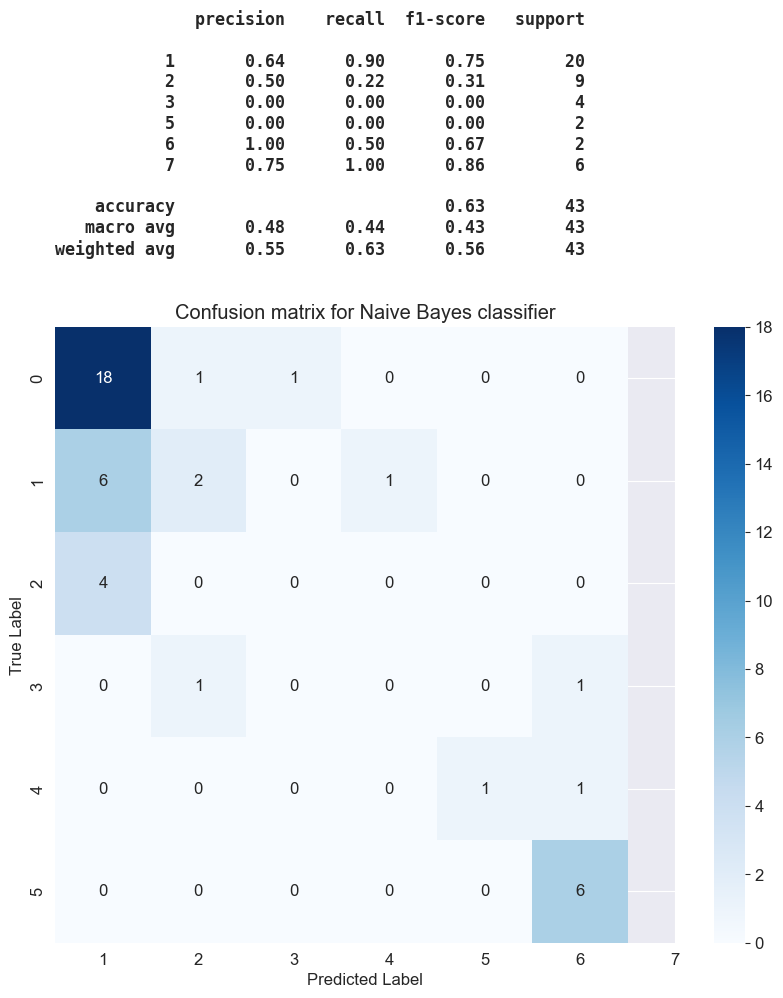

In [52]:
#Define parameters
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

# Train Naive Bayes with Best Parameters
naive_bayes_classifier = GaussianNB()
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Make predictions with best parameters
best_naive_bayes = grid_search.best_estimator_
y_pred = best_naive_bayes.predict(x_test)

#Best Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("===============================================")
print("Best Accuracy with Naive Bayes Classifier:", round((accuracy*100),2), "%")
print("===============================================")

confus_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Heatmap - confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6', '7'])

# Add classification report as annotation
plt.text(0, -0.5, classification_rep, fontsize=12, fontweight='bold', fontfamily='monospace', ha='left')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Naive Bayes classifier")
plt.show()

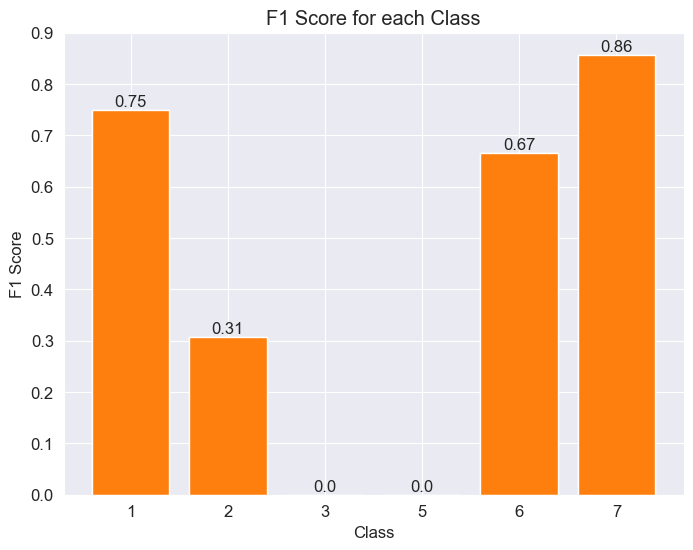

In [44]:
# Extract F1 scores for each class
classification_rep = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {class_label: metrics['f1-score'] for class_label, metrics in classification_rep.items() if class_label.isdigit()}

#Convert the dictionary into separate lists for class labels and corresponding F1 scores
class_labels = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

# Plot the F1 scores
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, f1_scores_values)
plt.bar(class_labels, f1_scores_values)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each Class')

# Add the numeric value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


    Naive Bayes seemed to have performed best in classifying glass type 1 & 7 with F1-Scores of .75 and .86 respectivly. With a high recall of .9 and 1.0 for classifying glass type 1 and 7, we can see that the classifier was able to correctly identify the true postive cases for type 1 & 7 without many type II errors (False Negatives)

    We can also see that the model performed poorly in classifying 2,3,& 5. With very low f1-scores.

**Decision trees classifier**


Best Accuracy with Decision Tree: 79.07 %


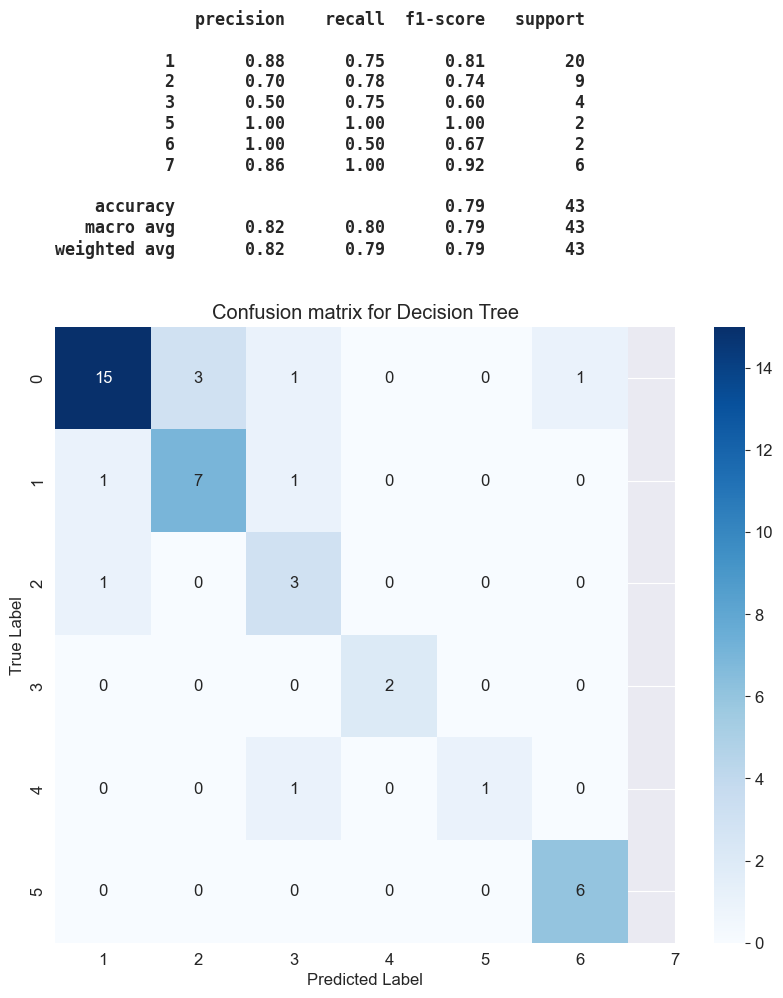

In [45]:
# Using the best parameters
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

#Train the Decision tree using best parameters
decision_tree_classifier = DecisionTreeClassifier(random_state=44)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)


# Make prediction for best DT model
best_decision_tree = grid_search.best_estimator_
y_pred = best_decision_tree.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("===============================================")
print("Best Accuracy with Decision Tree:", round((accuracy*100),2), "%")
print("===============================================")

confus_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Heatmap - confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6', '7'])


# Add classification report as annotation
plt.text(0, -0.5, classification_rep, fontsize=12, fontweight='bold', fontfamily='monospace', ha='left')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Decision Tree")
plt.show()

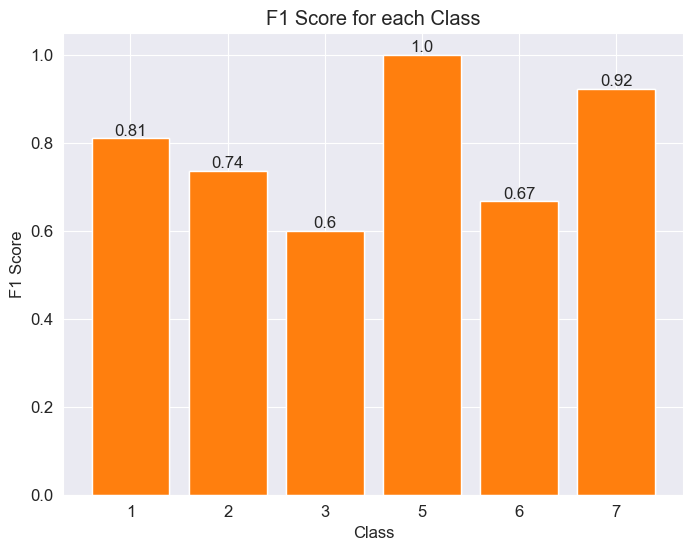

In [46]:
# Extract F1 scores for each class
classification_rep = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {class_label: metrics['f1-score'] for class_label, metrics in classification_rep.items() if class_label.isdigit()}

#Convert the dictionary into separate lists for class labels and corresponding F1 scores
class_labels = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

# Plot the F1 scores
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, f1_scores_values)
plt.bar(class_labels, f1_scores_values)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each Class')

# Add the numeric value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


      The Decision Tree yielded good results across most of the classes, having high precision and recall. This means that this model correctly classified most glass types without a lot of cases for False Positives and False Negatives.
   
      The only class the decision tree showed to have lower performance is for glass type 3, where the precision was .5. This means that 50% of predictions for glass type 3, were not actually glass type 3, but were false positives.

**KNN Classifier**

--------------------
Best Accuracy with KNN Classifier: 74.42 %
--------------------


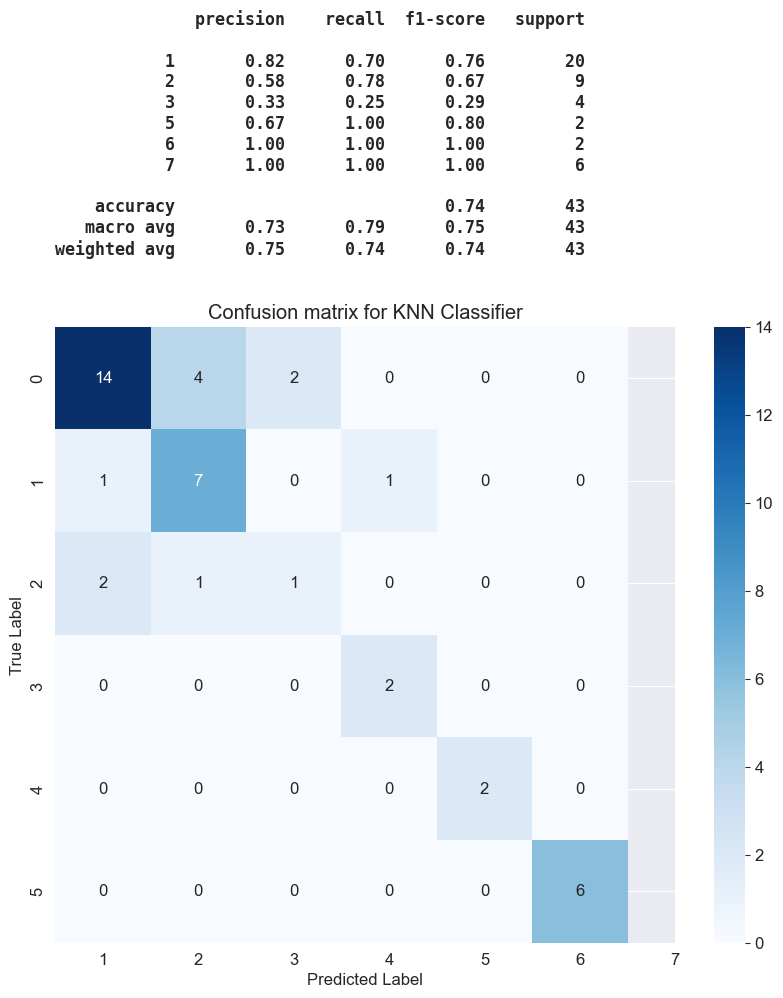

In [47]:
#Hyperparameter Tunning
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Train a KNN classifier _ use best parameters
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Make prediction with best params
best_knn_classifier = grid_search.best_estimator_
y_pred = best_knn_classifier.predict(x_test)

# Best Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("--------------------")
print("Best Accuracy with KNN Classifier:", round((accuracy*100),2), "%")
print("--------------------")

confus_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


# Heatmap - confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6', '7'])


# Add classification report as annotation
plt.text(0, -0.5, classification_rep, fontsize=12, fontweight='bold', fontfamily='monospace', ha='left')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN Classifier")
plt.show()

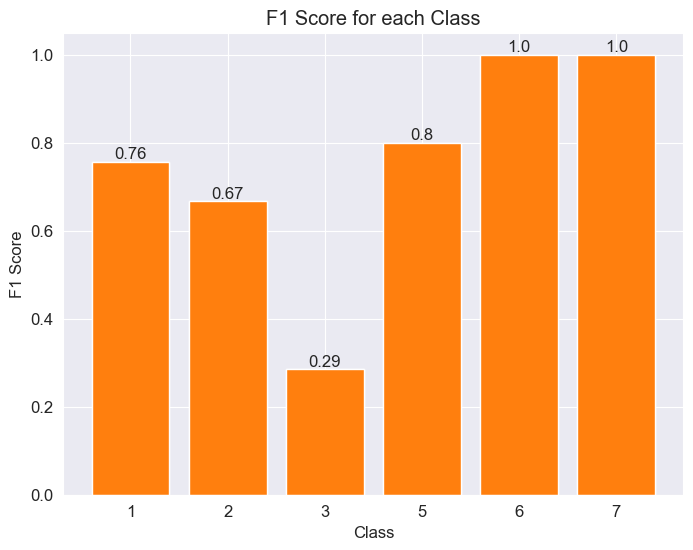

In [48]:
# Extract F1 scores for each class
classification_rep = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {class_label: metrics['f1-score'] for class_label, metrics in classification_rep.items() if class_label.isdigit()}

#Convert the dictionary into separate lists for class labels and corresponding F1 scores
class_labels = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

# Plot the F1 scores
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, f1_scores_values)
plt.bar(class_labels, f1_scores_values)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each Class')

# Add the numeric value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


    The KNN Classifier seemed to have performed similarly to the decison tree classifier, but slightly worse overall. The model yielded acceptable results in classifying all glass types beside glass type 3.

    This model had an f1-score of .29 with low precision and recall values of : .33 & .25.
    This showed that KNN yielded many false positives and false negatives when predicting glass type 3.


### Part 5: Cross Validation
Since we have imbalanced classes, we will perform cross validation on all 3 models with 10 folds. This will let us see how our model does when given unseen data.

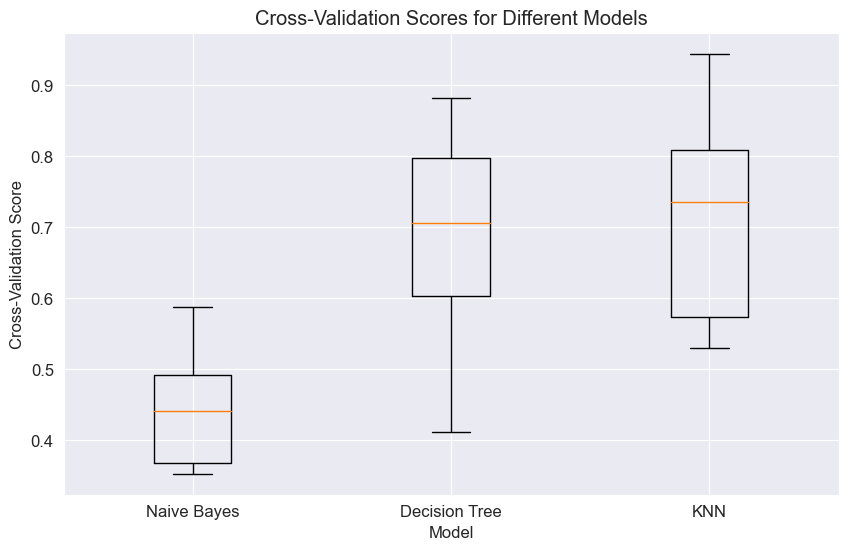

In [49]:
# cross validation on Naive Bayes
crossValNB = cross_val_score(best_naive_bayes, x_train, y_train, cv=10)
# cross validation on Decision Tree
crossValDT = cross_val_score(best_decision_tree, x_train, y_train, cv=10)
# cross validation on KNN
crossValKNN = cross_val_score(best_knn_classifier, x_train, y_train, cv=10)


# Define the models' names
models = ['Naive Bayes', 'Decision Tree', 'KNN']

# Define the cross-validation scores
val_scores = [crossValNB, crossValDT, crossValKNN]

# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(val_scores)
plt.xticks(range(1, len(models) + 1), models)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different Models')
plt.show()



    Bases on the Cross Validation scores, we can see that Decision Tree and KNN models outperform Naive Bayes. 

    It seems that the KNN model yielded the best average score across all 10 folds. This means that KNN is probably the most robust as it can handle unseen data the best, which is significant as our dataset consists of imbalanced classes.

### Part 6: Conclusion
    After evaluating the models, our team would like to push forward the use of the KNN model for the forensic scientists. The KNN model yields good performance with acceptable precision and accuracy scores. Even though our Decision Tree model performed slightly better for our testing data, the cross validation showed how KNN outperformed all other models when dealing with unseen data. This is quite important as forensic scientists often have to deal with unexpected evidence, which means that they need a robust model that can perform in unexpected situations.